```{contents}
```

## Softmax Activation

Softmax is an **activation function used in the output layer of a neural network** for **multi-class classification problems**.

* It converts the raw outputs $logits$ from the network into **probabilities** for each class.
* The probabilities **sum up to 1**, which makes them interpretable as a proper probability distribution.

---

### Why use Softmax

* **Binary classification:** Use **Sigmoid** (outputs one probability between 0 and 1).
* **Multi-class classification:** Use **Softmax** (outputs probabilities for multiple classes).

Example:

* Classes: Cat, Dog, Monkey, Horse
* Network raw outputs (logits): `[-1, 0, 3, 5]`
* Softmax converts these into probabilities like: `[0.002, 0.006, 0.118, 0.874]`
* Highest probability → predicted class (Horse in this case).

---

###  Why we need Softmax

* **Activation functions** are applied at the output layer to map the network’s raw outputs (logits) into a meaningful form.

* **Sigmoid**: Used for **binary classification** (2 classes).

  * Maps any number to a value between 0 and 1.
  * Example: if output > 0.5 → class 1, else class 0.

* **Problem with Sigmoid in multi-class classification:**

  * If you have more than 2 classes, sigmoid outputs independent probabilities for each class.
  * These probabilities **don’t sum to 1**, which is required to interpret them as a probability distribution over multiple classes.

* **Softmax:** Specifically used for **multi-class classification** in the output layer.

  * Converts raw outputs (logits) into probabilities that **sum to 1** across all classes.
  * Ensures that the model predicts a single class with the highest probability.

---

### Softmax Formula

For the $i$-th output:

$$
\text{Softmax}(y_i) = \frac{e^{y_i}}{\sum_{k=1}^{n} e^{y_k}}
$$

Where:

* $y_i$ = raw output $logit$ for class $i$
* $n$ = total number of classes
* $e$ = exponential function

**Key idea:** Each class’s probability is **its exponentiated score divided by the sum of all exponentiated scores**.

---

### How it works (step-by-step)

1. Take raw outputs (logits): `$$-1, 0, 3, 5$$`
2. Exponentiate each: `$$0.3679, 1, 20.085, 148.413$$`
3. Sum them: `0.3679 + 1 + 20.085 + 148.413 ≈ 169.865`
4. Divide each exponent by the sum → probabilities:

   * Cat: 0.3679 / 169.865 ≈ 0.002
   * Dog: 1 / 169.865 ≈ 0.006
   * Monkey: 20.085 / 169.865 ≈ 0.118
   * Horse: 148.413 / 169.865 ≈ 0.874

✅ Sum = 1

* The network predicts **Horse**, because it has the highest probability.

---

### Intuition

* Softmax turns scores into a “competition” between classes.
* Higher raw output → higher probability.
* The class with the **largest score dominates** the output.

---

**Summary Table**

| Task                       | Output Layer Activation |
| -------------------------- | ----------------------- |
| Binary classification      | Sigmoid                 |
| Multi-class classification | Softmax                 |


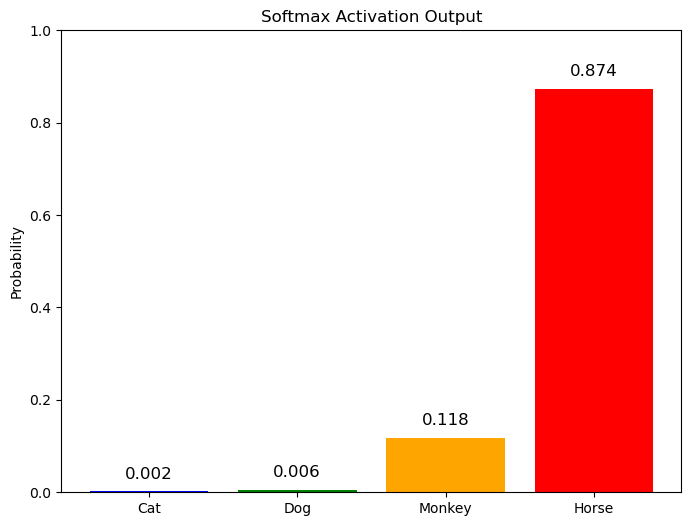

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Raw outputs (logits) from the network
logits = np.array(-1, 0, 3, 5)
classes = ['Cat', 'Dog', 'Monkey', 'Horse']

# Softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Compute probabilities
probabilities = softmax(logits)

# Plotting
plt.figure(figsize=(8,6))
bars = plt.bar(classes, probabilities, color=['blue', 'green', 'orange', 'red'])
plt.title("Softmax Activation Output")
plt.ylabel("Probability")
plt.ylim(0, 1)

# Display probability values on top of bars
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{prob:.3f}", 
             ha='center', va='bottom', fontsize=12)

plt.show()
